<a href="https://colab.research.google.com/github/skywalker0803r/CFB/blob/main/NARX%E7%AC%AC%E4%BA%8C%E6%AE%B5%E8%84%AB%E7%A1%AB%E6%95%88%E7%8E%87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/脫硫劑優化改善/20240916-CFB2脫硫劑優化改善.xlsx')
col = df.columns
df = df.iloc[1:,:]
df.columns = col
df = df.set_index('Unnamed: 0')
df.index.name = 'datetime'
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


,MLUT4_AIA792101A,MLUT4_AIA792101B,MLUT4_AIC-232B,MLUT4_AT-232A,MLUT4_AT-237,MLUT4_AT-240,MLUT4_AT-240A,MLUT4_FIC-231A,MLUT4_FIC-231B,MLUT4_FIC-231C,...,MLUT4_TE-252F,MLUT4_TE-252G,MLUT4_TE-252H,MLUT4_TE-252I,MLUT4_ZT-231,MLUT4_ZT-232,DeSOx_1st,DeSOx_2nd,前爐SOx濃度,鈣硫比
datetime,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:00:00,5.540932,6.8,67.034424,151.208024,9.623605,8.619934,8.619934,20.605973,0,17.456094,...,876.984866,845.297084,845.703201,876.997523,59.200001,15,0.969941,0.871410,2230.093232,2.223152
2024-01-01 00:05:00,5.533478,6.8,66.662524,150.811453,9.616252,8.147002,8.147002,20.18102,0,17.449118,...,875.326466,846.587071,844.10285,877.38106,59.200001,15,0.969979,0.877787,2220.527929,2.220789
2024-01-01 00:10:00,5.526025,6.8,64.320729,151.708113,9.608899,8.247992,8.247992,20.200619,0,17.442142,...,875.675699,845.374599,843.500123,877.8976,59.200001,15,0.971249,0.871768,2237.129686,2.217612
2024-01-01 00:15:00,5.518571,6.801543,64.840762,151.283528,9.600898,7.60582,7.60582,20.220218,0,17.571883,...,875.435828,845.10045,842.910508,874.888616,59.200001,15,0.970896,0.882700,2227.895501,2.214444
2024-01-01 00:20:00,5.511117,6.819977,64.390831,150.994896,9.581994,6.110485,6.110485,20.549012,0,17.339679,...,875.2454,846.058978,844.200021,878.41671,59.200001,15,0.970878,0.905103,2211.052236,2.211285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-15 23:35:00,6.258452,5.140339,114.166438,209.520746,9.360355,13.105704,13.105704,12.795748,11.854892,12.8422,...,916.635699,889.885541,906.016252,870.865216,100,26.103367,0.945172,0.885205,2082.274527,3.928554
2024-09-15 23:40:00,6.284992,5.166336,106.669841,208.177318,9.280099,9.903673,9.903673,12.797045,11.862273,12.823741,...,914.06561,889.042164,904.255862,869.007829,100,26.093265,0.948517,0.907156,2071.948976,3.927730
2024-09-15 23:45:00,6.232171,5.225976,104.663595,211.564232,9.359701,9.345572,9.345572,12.798342,11.880556,12.842696,...,913.978871,890.439554,903.442876,867.71297,100,26.1,0.949882,0.910708,2088.339754,3.928170


#欄位計算

In [ ]:
v3 = df['MLUT4_FIQ-2BTCF']
v38 = df['MLUT4_FQ-239']
v3 = pd.to_numeric(v3, errors='coerce')
v38 = pd.to_numeric(v38, errors='coerce')
print((v3 == 0).sum(),(v38 == 0).sum())
print(v3.isnull().sum(),v38.isnull().sum())#2 0
print(v3*8/v38*64.04/24.5*1000,df['前爐SOx濃度'])
assert (v3*8/v38*64.04/24.5*1000).all() == df['前爐SOx濃度'].all()
df['前爐SOx濃度'] = v3*8/v38*64.04/24.5*1000
print(df['前爐SOx濃度'].isnull().sum())#18054

18921 18260
2 0
datetime
2024-01-01 00:00:00    2230.093232
2024-01-01 00:05:00    2220.527929
2024-01-01 00:10:00    2237.129686
2024-01-01 00:15:00    2227.895501
2024-01-01 00:20:00    2211.052236
                          ...     
2024-09-15 23:35:00    2082.274527
2024-09-15 23:40:00    2071.948976
2024-09-15 23:45:00    2088.339754
2024-09-15 23:50:00    2034.665472
2024-09-15 23:55:00    2048.422596
Length: 74592, dtype: float64 datetime
2024-01-01 00:00:00    2230.093232
2024-01-01 00:05:00    2220.527929
2024-01-01 00:10:00    2237.129686
2024-01-01 00:15:00    2227.895501
2024-01-01 00:20:00    2211.052236
                          ...     
2024-09-15 23:35:00    2082.274527
2024-09-15 23:40:00    2071.948976
2024-09-15 23:45:00    2088.339754
2024-09-15 23:50:00    2034.665472
2024-09-15 23:55:00    2048.422596
Name: 前爐SOx濃度, Length: 74592, dtype: float64
18054


# 缺失值那麼多是0導致的

In [ ]:
v1 = df['MLUT4_RQ-2BTLS']
v3 = df['MLUT4_FIQ-2BTCF']
v1 = pd.to_numeric(v1, errors='coerce')
v3 = pd.to_numeric(v3, errors='coerce')
print(v1/v3*0.32/0.008,df['鈣硫比'])
df['鈣硫比'] = v1/v3*0.32/0.008

datetime
2024-01-01 00:00:00    2.223152
2024-01-01 00:05:00    2.220789
2024-01-01 00:10:00    2.217612
2024-01-01 00:15:00    2.214444
2024-01-01 00:20:00    2.211285
                         ...   
2024-09-15 23:35:00    3.928554
2024-09-15 23:40:00    3.927730
2024-09-15 23:45:00    3.928170
2024-09-15 23:50:00    3.927928
2024-09-15 23:55:00    3.928171
Length: 74592, dtype: float64 datetime
2024-01-01 00:00:00    2.223152
2024-01-01 00:05:00    2.220789
2024-01-01 00:10:00    2.217612
2024-01-01 00:15:00    2.214444
2024-01-01 00:20:00    2.211285
                         ...   
2024-09-15 23:35:00    3.928554
2024-09-15 23:40:00    3.927730
2024-09-15 23:45:00    3.928170
2024-09-15 23:50:00    3.927928
2024-09-15 23:55:00    3.928171
Name: 鈣硫比, Length: 74592, dtype: float64


In [ ]:
soxo = v3*8/v38*64.04/24.5*1000
v31 = df['MLUT4_AIC-232B']
v31 = pd.to_numeric(v31, errors='coerce')
print(v31.isnull().sum(),soxo.isnull().sum())
print((soxo-v31)/soxo,df['DeSOx_1st'])
df['DeSOx_1st'] = (soxo-v31)/soxo

0 18054
datetime
2024-01-01 00:00:00    0.969941
2024-01-01 00:05:00    0.969979
2024-01-01 00:10:00    0.971249
2024-01-01 00:15:00    0.970896
2024-01-01 00:20:00    0.970878
                         ...   
2024-09-15 23:35:00    0.945172
2024-09-15 23:40:00    0.948517
2024-09-15 23:45:00    0.949882
2024-09-15 23:50:00    0.949256
2024-09-15 23:55:00    0.946246
Length: 74592, dtype: float64 datetime
2024-01-01 00:00:00    0.969941
2024-01-01 00:05:00    0.969979
2024-01-01 00:10:00    0.971249
2024-01-01 00:15:00    0.970896
2024-01-01 00:20:00    0.970878
                         ...   
2024-09-15 23:35:00    0.945172
2024-09-15 23:40:00    0.948517
2024-09-15 23:45:00    0.949882
2024-09-15 23:50:00    0.949256
2024-09-15 23:55:00    0.946246
Name: DeSOx_1st, Length: 74592, dtype: float64


In [ ]:
v31 = df['MLUT4_AIC-232B']
v39 = df['MLUT4_AT-240']
v31 = pd.to_numeric(v31, errors='coerce')
v39 = pd.to_numeric(v39, errors='coerce')
print((v31-v39)/v31,df['DeSOx_2nd'])
df['DeSOx_2nd'] = (v31-v39)/v31

datetime
2024-01-01 00:00:00    0.871410
2024-01-01 00:05:00    0.877787
2024-01-01 00:10:00    0.871768
2024-01-01 00:15:00    0.882700
2024-01-01 00:20:00    0.905103
                         ...   
2024-09-15 23:35:00    0.885205
2024-09-15 23:40:00    0.907156
2024-09-15 23:45:00    0.910708
2024-09-15 23:50:00    0.919579
2024-09-15 23:55:00    0.918868
Length: 74592, dtype: float64 datetime
2024-01-01 00:00:00    0.871410
2024-01-01 00:05:00    0.877787
2024-01-01 00:10:00    0.871768
2024-01-01 00:15:00    0.882700
2024-01-01 00:20:00    0.905103
                         ...   
2024-09-15 23:35:00    0.885205
2024-09-15 23:40:00    0.907156
2024-09-15 23:45:00    0.910708
2024-09-15 23:50:00    0.919579
2024-09-15 23:55:00    0.918868
Name: DeSOx_2nd, Length: 74592, dtype: float64


# 缺失值檢查

In [ ]:
import pandas as pd

def check_missing_values(df):
    """
    檢查 DataFrame 中每個欄位的缺失值數量與占比

    參數:
        df (pd.DataFrame): 要檢查的 DataFrame

    回傳:
        pd.DataFrame: 包含欄位名稱、缺失值數量、缺失占比的 DataFrame
    """
    total_rows = len(df)
    missing_count = df.isnull().sum()
    missing_ratio = missing_count / total_rows

    result = pd.DataFrame({
        'Missing Count': missing_count,
        'Missing Ratio': missing_ratio
    })

    return result[result['Missing Count'] > 0].sort_values(by='Missing Ratio', ascending=False)
check_missing_values(df)

,Missing Count,Missing Ratio
MLUT4_SIV-B7921,67848,0.909588
DeSOx_1st,18854,0.252762
鈣硫比,18798,0.252011
前爐SOx濃度,18054,0.242037
DeSOx_2nd,10351,0.138768
MLUT4_AIA792101B,2,0.000027
MLUT4_AT-232A,2,0.000027
MLUT4_AT-237,2,0.000027
MLUT4_AIA792101A,2,0.000027
MLUT4_FIC-233,2,0.000027


# 刪除離群值

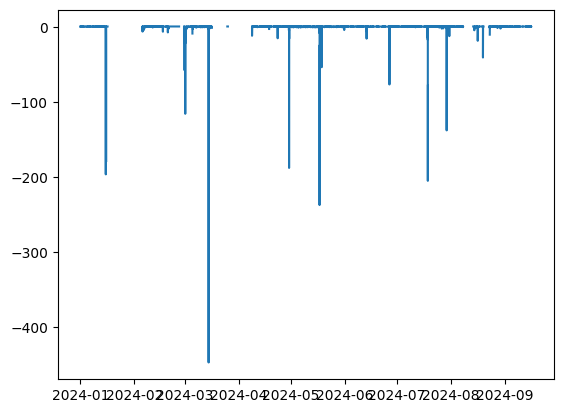

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df.index,df['DeSOx_2nd'])
plt.show()

In [ ]:
data = df[df['DeSOx_2nd']>0]
data

,MLUT4_AIA792101A,MLUT4_AIA792101B,MLUT4_AIC-232B,MLUT4_AT-232A,MLUT4_AT-237,MLUT4_AT-240,MLUT4_AT-240A,MLUT4_FIC-231A,MLUT4_FIC-231B,MLUT4_FIC-231C,...,MLUT4_TE-252F,MLUT4_TE-252G,MLUT4_TE-252H,MLUT4_TE-252I,MLUT4_ZT-231,MLUT4_ZT-232,DeSOx_1st,DeSOx_2nd,前爐SOx濃度,鈣硫比
datetime,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:00:00,5.540932,6.8,67.034424,151.208024,9.623605,8.619934,8.619934,20.605973,0,17.456094,...,876.984866,845.297084,845.703201,876.997523,59.200001,15,0.969941,0.871410,2230.093232,2.223152
2024-01-01 00:05:00,5.533478,6.8,66.662524,150.811453,9.616252,8.147002,8.147002,20.18102,0,17.449118,...,875.326466,846.587071,844.10285,877.38106,59.200001,15,0.969979,0.877787,2220.527929,2.220789
2024-01-01 00:10:00,5.526025,6.8,64.320729,151.708113,9.608899,8.247992,8.247992,20.200619,0,17.442142,...,875.675699,845.374599,843.500123,877.8976,59.200001,15,0.971249,0.871768,2237.129686,2.217612
2024-01-01 00:15:00,5.518571,6.801543,64.840762,151.283528,9.600898,7.60582,7.60582,20.220218,0,17.571883,...,875.435828,845.10045,842.910508,874.888616,59.200001,15,0.970896,0.882700,2227.895501,2.214444
2024-01-01 00:20:00,5.511117,6.819977,64.390831,150.994896,9.581994,6.110485,6.110485,20.549012,0,17.339679,...,875.2454,846.058978,844.200021,878.41671,59.200001,15,0.970878,0.905103,2211.052236,2.211285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-15 23:35:00,6.258452,5.140339,114.166438,209.520746,9.360355,13.105704,13.105704,12.795748,11.854892,12.8422,...,916.635699,889.885541,906.016252,870.865216,100,26.103367,0.945172,0.885205,2082.274527,3.928554
2024-09-15 23:40:00,6.284992,5.166336,106.669841,208.177318,9.280099,9.903673,9.903673,12.797045,11.862273,12.823741,...,914.06561,889.042164,904.255862,869.007829,100,26.093265,0.948517,0.907156,2071.948976,3.927730
2024-09-15 23:45:00,6.232171,5.225976,104.663595,211.564232,9.359701,9.345572,9.345572,12.798342,11.880556,12.842696,...,913.978871,890.439554,903.442876,867.71297,100,26.1,0.949882,0.910708,2088.339754,3.928170


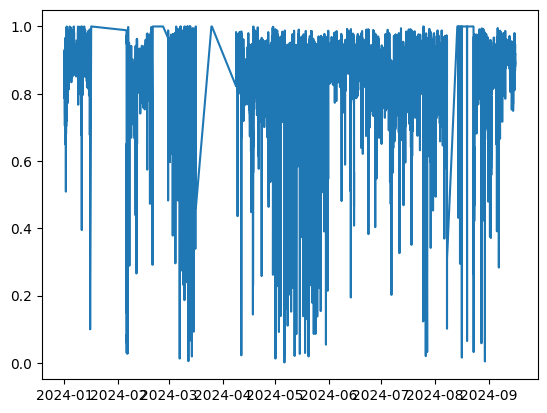

In [ ]:
plt.plot(data.index,data['DeSOx_2nd'])
plt.show()

# NARX 模型

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# 定義 MLP 模型
class SimpleMLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # 輸入層到隱藏層
        self.fc2 = nn.Linear(hidden_size, output_size)  # 隱藏層到輸出層

    def forward(self, x):
        x = F.relu(self.fc1(x))  # 使用 ReLU 作為隱藏層的啟用函數
        x = self.fc2(x)          # 輸出層（可依任務加上 softmax 或其他）
        return x

# 建立模型例子
input_size = 10     # 假設輸入特徵數量為 10
hidden_size = 32    # 隱藏層神經元數量
output_size = 2     # 假設為二分類任務

model = SimpleMLP(input_size, hidden_size, output_size)

# 查看模型結構
print(model)

SimpleMLP(
  (fc1): Linear(in_features=10, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=2, bias=True)
)


# 製作時間序列數據集

In [ ]:
def series_to_supervised(data, n_in=1, dropnan=True):
    n_vars = data.columns
    df = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [f"{j}(t-{i})" for j in n_vars]
    cols.append(df)
    names += [f'{j}(t)' for j in n_vars]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

series_to_supervised(data,n_in=5)

,MLUT4_AIA792101A(t-5),MLUT4_AIA792101B(t-5),MLUT4_AIC-232B(t-5),MLUT4_AT-232A(t-5),MLUT4_AT-237(t-5),MLUT4_AT-240(t-5),MLUT4_AT-240A(t-5),MLUT4_FIC-231A(t-5),MLUT4_FIC-231B(t-5),MLUT4_FIC-231C(t-5),...,MLUT4_TE-252F(t),MLUT4_TE-252G(t),MLUT4_TE-252H(t),MLUT4_TE-252I(t),MLUT4_ZT-231(t),MLUT4_ZT-232(t),DeSOx_1st(t),DeSOx_2nd(t),前爐SOx濃度(t),鈣硫比(t)
datetime,,,,,,,,,,,,,,,,,,,,,
2024-08-23 14:25:00,13.480385,12.739464,31.717414,47.694098,15.755567,16,16,0,0,0,...,629.90077,604.925974,501.587254,988.882686,99.740399,16.200001,-inf,0.551271,0.000000,inf
2024-08-23 14:30:00,14.178477,13.437897,33.477063,49.33727,16.61074,16,16,0,0,0,...,634.510452,616.612741,501.73016,999.144745,99.738254,16.200001,-inf,0.549878,0.000000,inf
2024-08-23 14:35:00,13.974427,13.182481,33.309823,50.213641,16.415978,16,16,0,0,0,...,637.779401,618.07704,502.556976,988.695009,99.729345,16.200001,-0.817658,0.504951,19.875879,195.389114
2024-08-23 14:40:00,13.977799,13.223988,32.599451,50.41673,16.34175,15.782493,15.782493,0,0,0,...,629.626255,619.791298,507.746156,977.465267,99.761702,16.200001,0.597165,0.506240,89.386669,43.560164
2024-08-23 14:45:00,13.881725,13.085113,30.510056,49.834969,16.315331,13.982434,13.984756,0,0,0,...,629.164812,634.422202,513.261534,965.920362,99.71379,16.200001,0.680986,0.512573,113.930530,33.946283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-15 23:35:00,6.093839,5.099072,112.076521,214.550692,9.284945,11.952027,11.923955,12.789265,11.907529,12.82,...,916.635699,889.885541,906.016252,870.865216,100,26.103367,0.945172,0.885205,2082.274527,3.928554
2024-09-15 23:40:00,6.191285,5.188772,116.585197,212.710068,9.334568,14.104158,14.104158,12.790561,11.865402,12.858627,...,914.06561,889.042164,904.255862,869.007829,100,26.093265,0.948517,0.907156,2071.948976,3.927730
2024-09-15 23:45:00,6.246399,5.208967,112.034897,212.227515,9.399174,11.490387,11.498885,12.791858,11.86567,12.798134,...,913.978871,890.439554,903.442876,867.71297,100,26.1,0.949882,0.910708,2088.339754,3.928170


In [ ]:
XY = series_to_supervised(data,n_in=5)
X = XY.drop(columns='DeSOx_2nd(t)')
Y = XY['DeSOx_2nd(t)']
display(X),display(Y)

,MLUT4_AIA792101A(t-5),MLUT4_AIA792101B(t-5),MLUT4_AIC-232B(t-5),MLUT4_AT-232A(t-5),MLUT4_AT-237(t-5),MLUT4_AT-240(t-5),MLUT4_AT-240A(t-5),MLUT4_FIC-231A(t-5),MLUT4_FIC-231B(t-5),MLUT4_FIC-231C(t-5),...,MLUT4_TE-252E(t),MLUT4_TE-252F(t),MLUT4_TE-252G(t),MLUT4_TE-252H(t),MLUT4_TE-252I(t),MLUT4_ZT-231(t),MLUT4_ZT-232(t),DeSOx_1st(t),前爐SOx濃度(t),鈣硫比(t)
datetime,,,,,,,,,,,,,,,,,,,,,
2024-08-23 14:25:00,13.480385,12.739464,31.717414,47.694098,15.755567,16,16,0,0,0,...,523.477861,629.90077,604.925974,501.587254,988.882686,99.740399,16.200001,-inf,0.000000,inf
2024-08-23 14:30:00,14.178477,13.437897,33.477063,49.33727,16.61074,16,16,0,0,0,...,526.199363,634.510452,616.612741,501.73016,999.144745,99.738254,16.200001,-inf,0.000000,inf
2024-08-23 14:35:00,13.974427,13.182481,33.309823,50.213641,16.415978,16,16,0,0,0,...,526.622243,637.779401,618.07704,502.556976,988.695009,99.729345,16.200001,-0.817658,19.875879,195.389114
2024-08-23 14:40:00,13.977799,13.223988,32.599451,50.41673,16.34175,15.782493,15.782493,0,0,0,...,529.287362,629.626255,619.791298,507.746156,977.465267,99.761702,16.200001,0.597165,89.386669,43.560164
2024-08-23 14:45:00,13.881725,13.085113,30.510056,49.834969,16.315331,13.982434,13.984756,0,0,0,...,531.848751,629.164812,634.422202,513.261534,965.920362,99.71379,16.200001,0.680986,113.930530,33.946283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-15 23:35:00,6.093839,5.099072,112.076521,214.550692,9.284945,11.952027,11.923955,12.789265,11.907529,12.82,...,913.593762,916.635699,889.885541,906.016252,870.865216,100,26.103367,0.945172,2082.274527,3.928554
2024-09-15 23:40:00,6.191285,5.188772,116.585197,212.710068,9.334568,14.104158,14.104158,12.790561,11.865402,12.858627,...,911.42474,914.06561,889.042164,904.255862,869.007829,100,26.093265,0.948517,2071.948976,3.927730
2024-09-15 23:45:00,6.246399,5.208967,112.034897,212.227515,9.399174,11.490387,11.498885,12.791858,11.86567,12.798134,...,911.234664,913.978871,890.439554,903.442876,867.71297,100,26.1,0.949882,2088.339754,3.928170


,DeSOx_2nd(t)
datetime,
2024-08-23 14:25:00,0.551271
2024-08-23 14:30:00,0.549878
2024-08-23 14:35:00,0.504951
2024-08-23 14:40:00,0.506240
2024-08-23 14:45:00,0.512573
...,...
2024-09-15 23:35:00,0.885205
2024-09-15 23:40:00,0.907156
2024-09-15 23:45:00,0.910708


(None, None)

# 馬氏距離刪除離群值

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2

def del_outliers_mahalanobis(df):
  mean_vec = df.mean().values
  cov_matrix = np.cov(df.values, rowvar=False)
  inv_cov_matrix = np.linalg.inv(cov_matrix)

  # Step 2: 計算每筆資料的馬氏距離
  def mahalanobis(x, mean, inv_cov):
      diff = x - mean
      return np.sqrt(diff.T @ inv_cov @ diff)

  # 計算所有樣本的距離
  distances = df.apply(lambda row: mahalanobis(row.values, mean_vec, inv_cov_matrix), axis=1)

  # Step 3: 決定閾值，例如卡方分布下95%置信區間的臨界值（自由度=2因為是兩欄）
  threshold = np.sqrt(chi2.ppf(0.99, df=2))

  # Step 4: 過濾掉離群樣本
  df_clean = df[distances < threshold]

  # 如果你想看哪些是離群值
  outliers = df[distances >= threshold]

  return df_clean

# 特徵篩選

<ipython-input-74-cff67b14d2bf>:52: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  XY.replace([np.inf, -np.inf], np.nan, inplace=True)


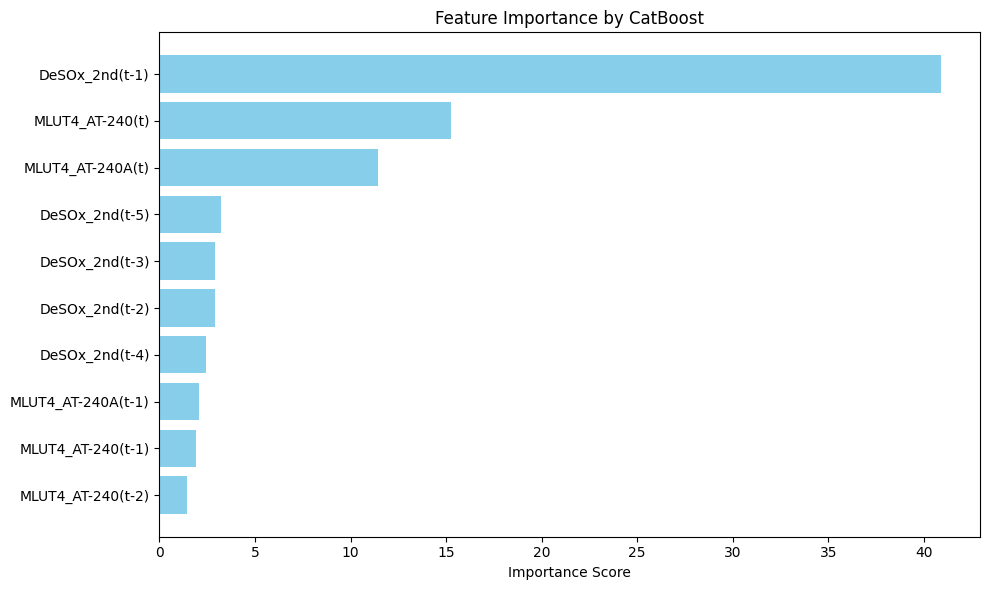

In [ ]:

from catboost import CatBoostRegressor, Pool
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def select_features_with_catboost(df: pd.DataFrame, x_col: list, y_col: str, top_k: int = None):
    """
    使用 CatBoost 根據特徵重要性篩選特徵。

    參數:
        df (pd.DataFrame): 資料集
        x_col (list): 特徵欄位名稱
        y_col (str): 目標欄位名稱
        top_k (int, optional): 若指定，回傳前 top_k 個重要特徵

    回傳:
        list: 篩選後的建議特徵名稱
    """
    # 準備資料
    X = df[x_col]
    y = df[y_col]

    model = CatBoostRegressor(verbose=0)
    model.fit(X, y)

    # 取得特徵重要性
    feature_importances = model.get_feature_importance()
    importance_df = pd.DataFrame({
        'feature': x_col,
        'importance': feature_importances
    }).sort_values(by='importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(importance_df.head(top_k)['feature'], importance_df.head(top_k)['importance'], color='skyblue')
    plt.gca().invert_yaxis()
    plt.title("Feature Importance by CatBoost")
    plt.xlabel("Importance Score")
    plt.tight_layout()
    plt.show()

    if  top_k:
        return importance_df['feature'].head(top_k).tolist()
    else:
        return importance_df['feature'].tolist()

# 保留數據表中藍色特徵跟Y
cols_to_remain = ['MLUT4_AT-237','MLUT4_AT-240','MLUT4_FQ-239','MLUT4_FT-951AA','MLUT4_FT-951AB','MLUT4_FT-956','MLUT4_FT-957','DeSOx_2nd']
x_col = [col for col in XY.columns if any(key in col for key in cols_to_remain)]
y_col = ['DeSOx_2nd(t)']
# 刪除Y欄位
x_col = list(set(x_col) - set(y_col))
XY.replace([np.inf, -np.inf], np.nan, inplace=True)
features = select_features_with_catboost(df=XY.dropna(subset=y_col),x_col=x_col, y_col=y_col, top_k=10)

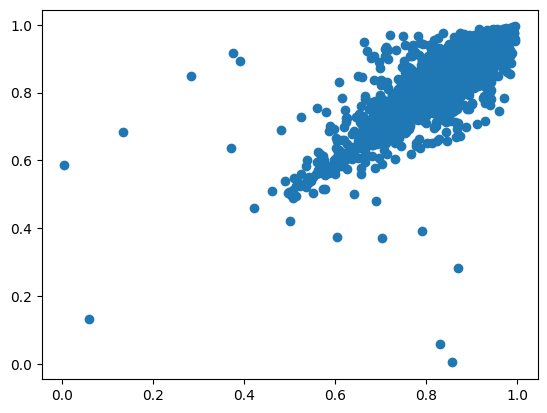

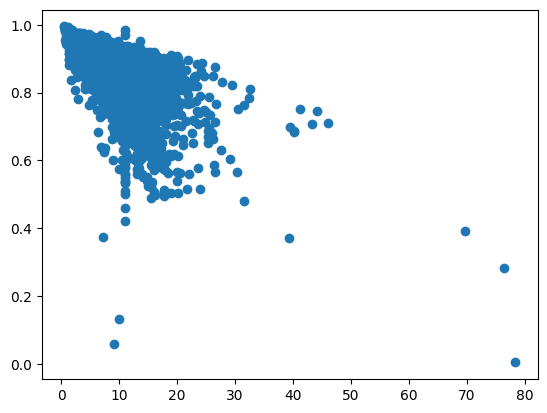

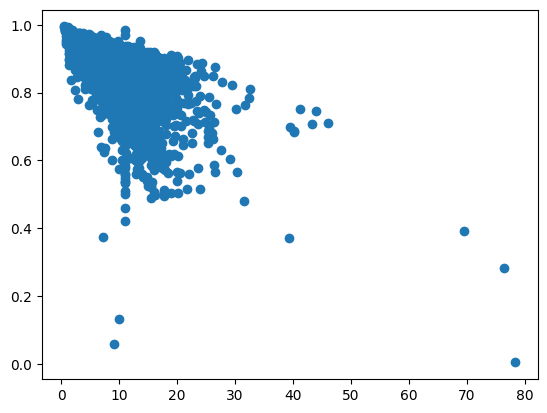

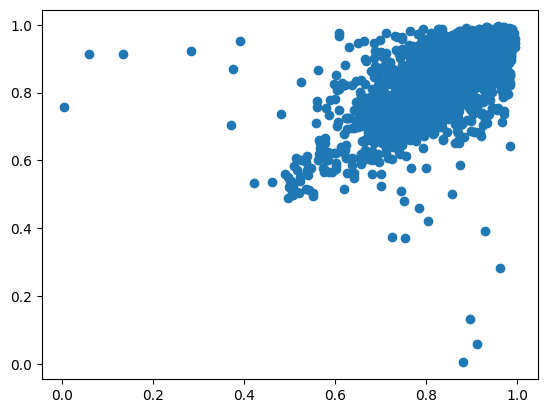

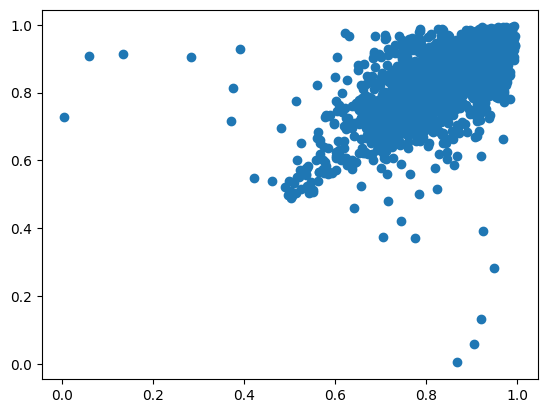

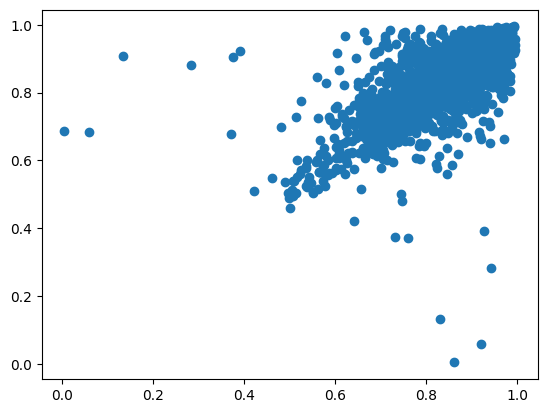

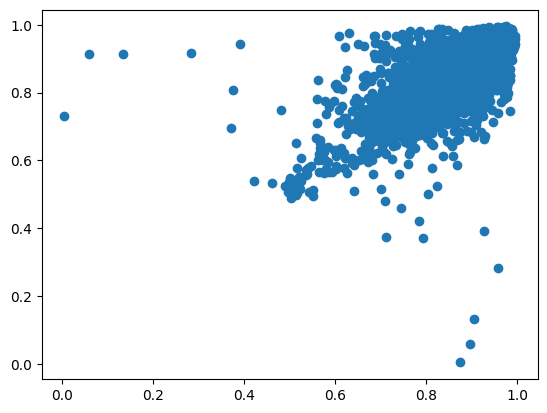

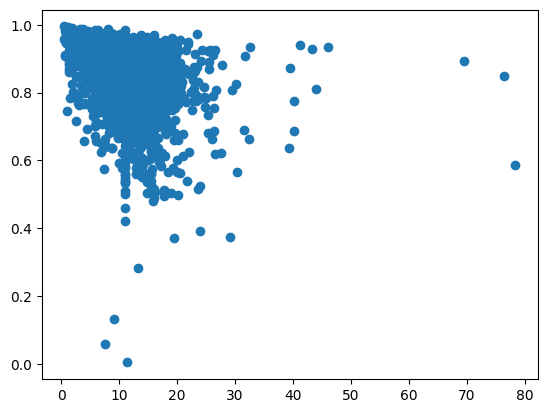

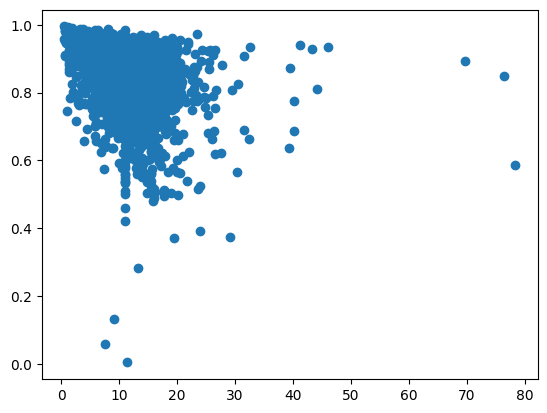

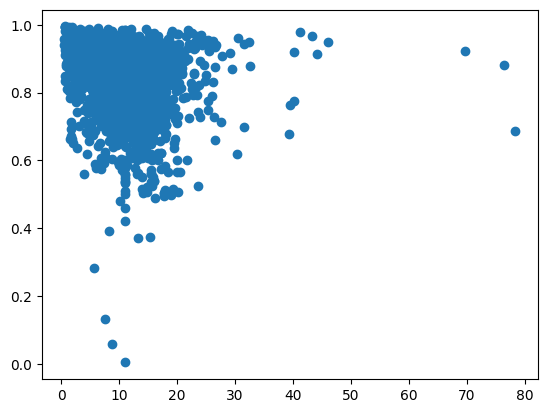

In [ ]:
for i in features:
  plt.scatter(XY[i],XY['DeSOx_2nd(t)'])
  plt.show()

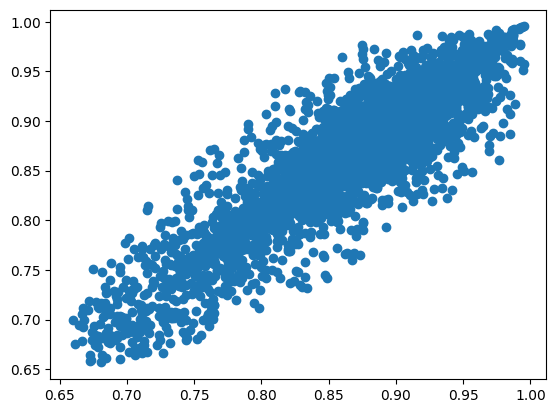

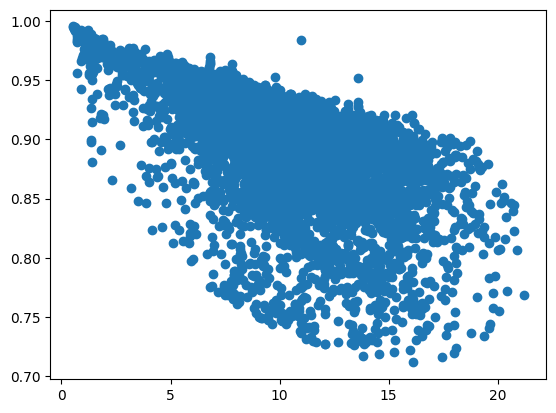

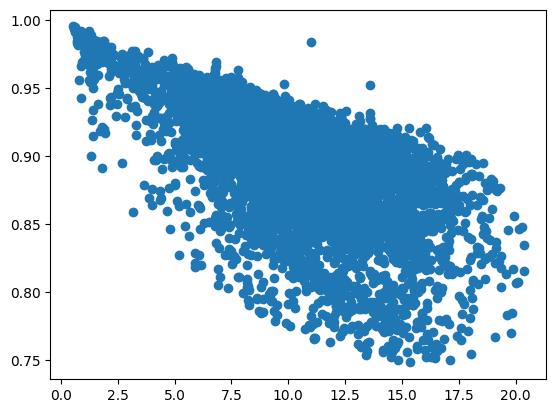

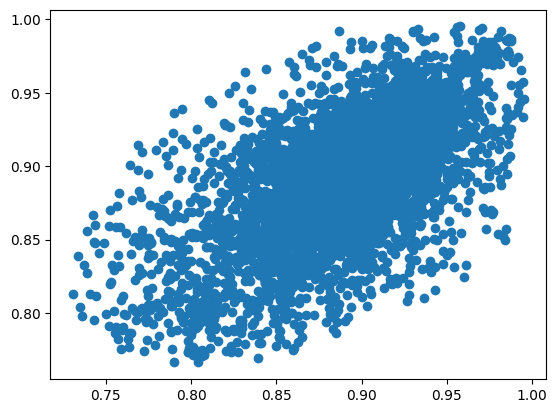

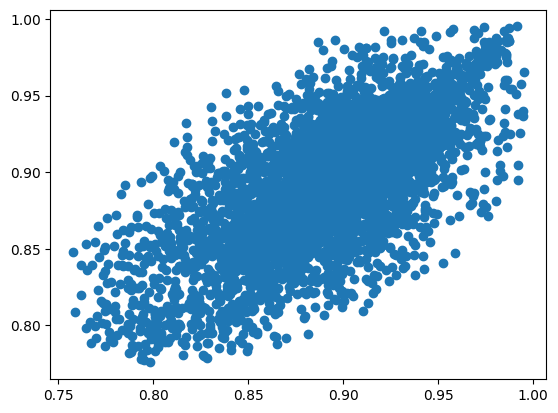

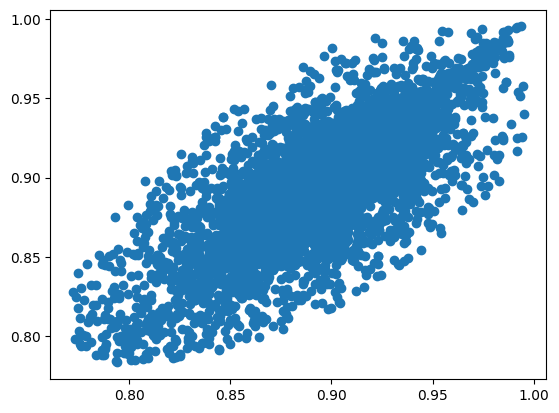

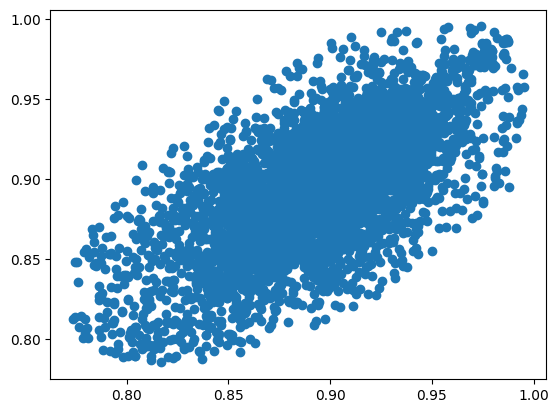

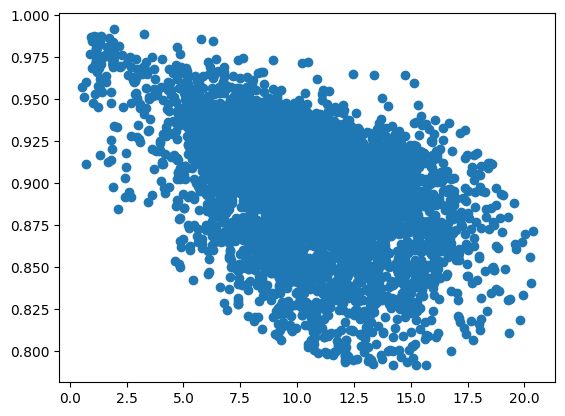

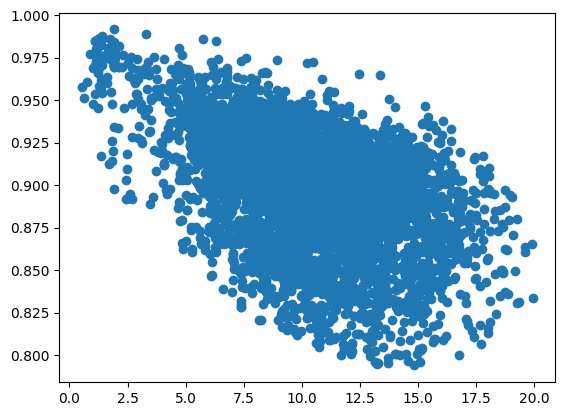

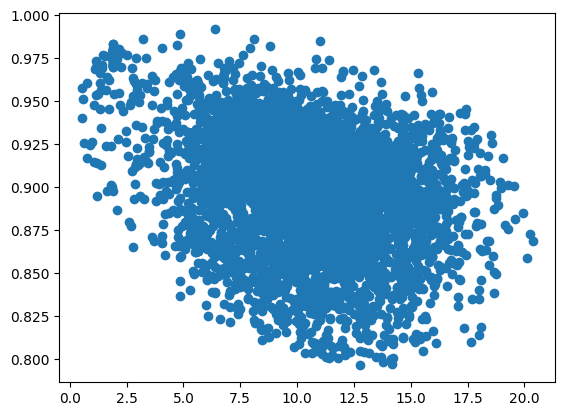

In [ ]:
for i in features:
  XY = XY.loc[del_outliers_mahalanobis(XY[[i,'DeSOx_2nd(t)']]).index,:]
  plt.scatter(XY[i],XY['DeSOx_2nd(t)'])
  plt.show()

In [ ]:
print(features)
print(y_col)

['DeSOx_2nd(t-1)', 'MLUT4_AT-240(t)', 'MLUT4_AT-240A(t)', 'DeSOx_2nd(t-5)', 'DeSOx_2nd(t-3)', 'DeSOx_2nd(t-2)', 'DeSOx_2nd(t-4)', 'MLUT4_AT-240A(t-1)', 'MLUT4_AT-240(t-1)', 'MLUT4_AT-240(t-2)']
['DeSOx_2nd(t)']


# 數據轉換

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
mm_x = MinMaxScaler()
mm_y = MinMaxScaler()
XY[features] = mm_x.fit_transform(XY[features])
XY[y_col] = mm_y.fit_transform(XY[y_col])
X = XY[features]
Y = XY[y_col]

# 切分成訓練/測試

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

def train_test_split(X, Y, train_ratio=0.8):
    total = len(X)
    train_size = int(total * train_ratio)
    return (X[:train_size], Y[:train_size],X[train_size:], Y[train_size:])

X_train, Y_train, X_test, Y_test = train_test_split(X,Y)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

import torch

X_train= torch.tensor(X_train.values, dtype=torch.float32)
Y_train= torch.tensor(Y_train.values, dtype=torch.float32)
X_test= torch.tensor(X_test.values, dtype=torch.float32)
Y_test= torch.tensor(Y_test.values, dtype=torch.float32)

# 建立 TensorDataset
train_dataset = TensorDataset(X_train, Y_train)
test_dataset = TensorDataset(X_test, Y_test)

# 建立 DataLoader（根據需要調整 batch_size）
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

(4246, 10) (4246, 1) (1062, 10) (1062, 1)


# 模型訓練

Epoch   0 | Train Loss: 0.1071 | Test Loss: 0.0202
Epoch   1 | Train Loss: 0.0162 | Test Loss: 0.0077
Epoch   2 | Train Loss: 0.0060 | Test Loss: 0.0048
Epoch   3 | Train Loss: 0.0046 | Test Loss: 0.0039
Epoch   4 | Train Loss: 0.0038 | Test Loss: 0.0033
Epoch   5 | Train Loss: 0.0033 | Test Loss: 0.0029
Epoch   6 | Train Loss: 0.0030 | Test Loss: 0.0026
Epoch   7 | Train Loss: 0.0027 | Test Loss: 0.0024
Epoch   8 | Train Loss: 0.0025 | Test Loss: 0.0022
Epoch   9 | Train Loss: 0.0023 | Test Loss: 0.0020


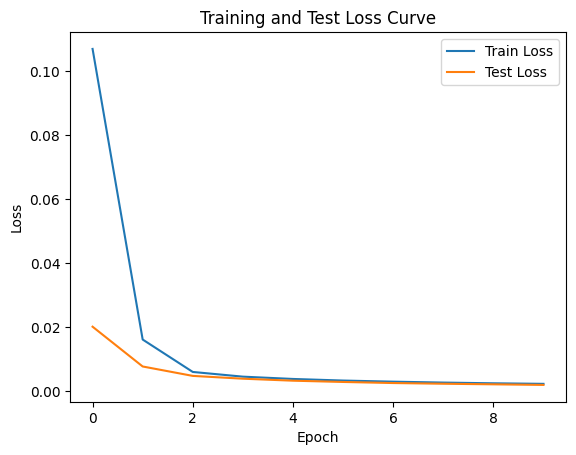

In [ ]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

model = SimpleMLP(X_train.shape[1], 32, 1)  # 輸出為 1（回歸）
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

train_losses = []
test_losses = []

for epoch in range(10):
    model.train()
    epoch_train_loss = 0.0
    for batch_X, batch_Y in train_loader:
        optimizer.zero_grad()

        # 確保 target 是 (batch_size, 1)
        if batch_Y.ndim == 1:
            batch_Y = batch_Y.view(-1, 1)

        outputs = model(batch_X)
        loss = loss_fn(outputs, batch_Y)
        loss.backward()
        optimizer.step()

        epoch_train_loss += loss.item()

    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # ===== Validation Phase =====
    model.eval()
    epoch_test_loss = 0.0
    with torch.no_grad():
        for batch_X, batch_Y in test_loader:
            if batch_Y.ndim == 1:
                batch_Y = batch_Y.view(-1, 1)

            outputs = model(batch_X)
            loss = loss_fn(outputs, batch_Y)
            epoch_test_loss += loss.item()

    avg_test_loss = epoch_test_loss / len(test_loader)
    test_losses.append(avg_test_loss)
    print(f"Epoch {epoch:3d} | Train Loss: {avg_train_loss:.4f} | Test Loss: {avg_test_loss:.4f}")

# ===== Plot training and test loss =====
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Test Loss Curve")
plt.legend()
plt.show()

# 預測圖

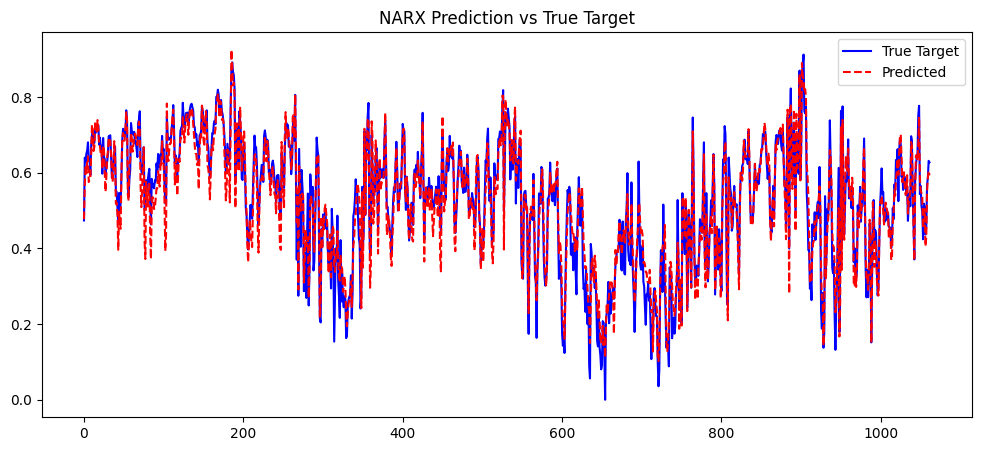

In [ ]:
import matplotlib.pyplot as plt

# 把資料轉為 numpy 以利繪圖
y_pred_np = model(X_test).detach().cpu().numpy().flatten()
targets_np = Y_test.detach().cpu().numpy().flatten()

# 畫圖
plt.figure(figsize=(12, 5))
plt.plot(targets_np, label='True Target', color='blue')
plt.plot(y_pred_np, label='Predicted', color='red', linestyle='--')
plt.legend()
plt.title('NARX Prediction vs True Target')
plt.show()

# 評估結果

In [ ]:

from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

def mean_absolute_percentage_error(a, b):
    mask = a != 0
    return (np.fabs(a - b)/a)[mask].mean()*100

# 轉換為 numpy
y_true = targets_np
y_predicted = y_pred_np

# 計算指標
r2 = r2_score(y_true, y_predicted)
rmse = np.sqrt(mean_squared_error(y_true, y_predicted))
mape = mean_absolute_percentage_error(y_true, y_predicted)

res = pd.DataFrame()
res['R2'] = [r2]
res['RMSE'] = [rmse]
res['MAPE'] = [mape]
res.index = ['第二段脫硫效率']
res

<ipython-input-82-717756266404>:6: RuntimeWarning: divide by zero encountered in divide
  return (np.fabs(a - b)/a)[mask].mean()*100


,R2,RMSE,MAPE
第二段脫硫效率,0.924177,0.04487,9.052394
